<a href="https://colab.research.google.com/github/vanessaredivo/Projeto-2-Senac-JP/blob/main/Novembro_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('mega_sena.csv')
print(dataset.columns)

Index(['id', 'concurso', 'ordem', 'bola', 'dia', 'mes', 'ano'], dtype='object')


In [ ]:
if 'Data' in dataset.columns:
  dataset['dia'] = pd.to_datetime(dataset['Data']).dt.day
  dataset['mes'] = pd.to_datetime(dataset['Data']).dt.month
  dataset['ano'] = pd.to_datetime(dataset['Data']).dt.year

In [ ]:
dataset = dataset[['ordem','bola', 'dia','mes','ano']]

In [ ]:
from scipy import stats
from patsy import dmatrices
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [ ]:
X = dataset.drop(columns = ['bola']).copy()
y = dataset[['bola']]

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using X instead of x
eval_set =[[x_test, y_test]]

In [ ]:
model = XGBRegressor(verbosity=0 , learning_rate=0.01, max_depth=3, n_estimators=1000, n_jobs=-1, random_state=1, min_child_weight=1, gama=0.0, subsample = 0.6, colsample_bytree = 0.6, scale_pos_weight =1, reg_alpha= 1e-05, early_stopping_rounds=10, eval_metric='rmse')

model.fit(X_train, y_train, eval_set=eval_set, verbose =1)

[0]	validation_0-rmse:17.33899
[1]	validation_0-rmse:17.33902
[2]	validation_0-rmse:17.33911
[3]	validation_0-rmse:17.33946
[4]	validation_0-rmse:17.33968
[5]	validation_0-rmse:17.33977
[6]	validation_0-rmse:17.34008
[7]	validation_0-rmse:17.34008
[8]	validation_0-rmse:17.34031
[9]	validation_0-rmse:17.34033
[10]	validation_0-rmse:17.34054


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gama=0.0, gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, ...)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed x to X

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

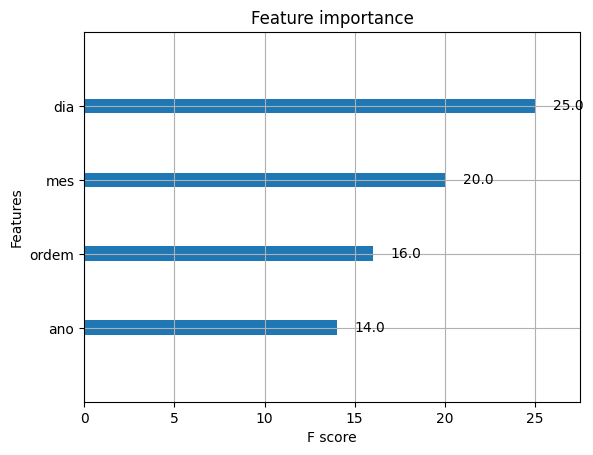

In [ ]:
plot_importance(model)

In [ ]:
# Corrected code: Changed x_train to X_train
score = model.score(X_train, y_train)
score

5.984306335449219e-05

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value, 2) for value in y_pred]
len(predictions)

3059

In [ ]:
def taxas_erro ( valores_reais, valores_previstos):
  #RMSE
  rmse = sqrt(mean_squared_error(valores_reais, valores_previstos))
  print('Erro médio quadrático: ', rmse)
  #MAE
  mae = mean_absolute_error(valores_reais, valores_previstos)
  print('Erro médio absoluto: ', mae)

In [ ]:
taxas_erro(y_test, predictions)

Erro médio quadrático:  17.339029631026786
Erro médio absoluto:  15.010003242355502


In [ ]:
model.predict([[5, 11, 5, 2024]])

array([30.44889], dtype=float32)